In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("ticks")

%config InlineBackend.figure_format = 'retina'

In [2]:
p_high = 0.0266
p_med = 0.0531
p_low = 0.0797
pal = ['#b2e1a8', '#b3cde3', '#fbb4ae']
pal2 = ['#abdea0', '#8fb6d6', '#f9867b']

In [3]:
def df_gen_unlim_fail(a, skill_start, p_high, p_med, p_low):
    l = []
    l.append(a)
    tot_fail = 0
    skill = ''

    for i in range(39):
        idx = 0
        r = random.uniform(0, 1)

        while idx in range(3):
            if idx == 0:
                x = (l[i][0] * (1 - p_high) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][0] * p_high /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1
            elif idx == 1:
                y = (l[i][1] * (1 - p_med) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][1] * p_med /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1
            elif idx == 2:
                z = (l[i][2] * (1 - p_low) /
                     (1 -
                      (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)) *
                     (1 - l[i][3]) + l[i][2] * p_low /
                     (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low) *
                     l[i][3])
                idx += 1

        if x > max(y, z):
            skill = 'H'
        elif y > max(x, z):
            skill = 'M'
        elif z > max(x, y):
            skill = 'L'

        if skill_start == 'H':
            if i == 38:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'M':
            if i == 38:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'L':
            if i == 38:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])
    return l

In [4]:
def df_gen_lim_fail(a, skill_start, p_high, p_med, p_low):
    l = []
    l.append(a)
    tot_fail = 0
    skill = ''

    for i in range(39):
        idx = 0
        r = random.uniform(0, 1)

        if tot_fail < 2:
            while idx in range(3):
                if idx == 0:
                    x = (l[i][0] * (1 - p_high) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][0] * p_high /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 1:
                    y = (l[i][1] * (1 - p_med) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][1] * p_med /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 2:
                    z = (l[i][2] * (1 - p_low) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][2] * p_low /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1

        if x > max(y, z):
            skill = 'H'
        elif y > max(x, z):
            skill = 'M'
        elif z > max(x, y):
            skill = 'L'

        if skill_start == 'H':
            if i == 38:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'M':
            if i == 38:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'L':
            if i == 38:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])
    return l

In [5]:
def df_gen_lim_fail_intervals(a, skill_start, p_high, p_med, p_low):
    l = []
    l.append(a)
    tot_fail = 0
    skill = ''

    for i in range(39):
        idx = 0
        r = random.uniform(0, 1)

        if tot_fail < 2:
            while idx in range(3):
                if idx == 0:
                    x = (l[i][0] * (1 - p_high) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][0] * p_high /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 1:
                    y = (l[i][1] * (1 - p_med) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][1] * p_med /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1
                elif idx == 2:
                    z = (l[i][2] * (1 - p_low) /
                         (1 - (l[i][0] * p_high + l[i][1] * p_med +
                               l[i][2] * p_low)) * (1 - l[i][3]) +
                         l[i][2] * p_low /
                         (l[i][0] * p_high + l[i][1] * p_med + l[i][2] * p_low)
                         * l[i][3])
                    idx += 1

        if x > max(y, z):
            skill = 'H'
        elif y > max(x, z):
            skill = 'M'
        elif z > max(x, y):
            skill = 'L'

        if skill_start == 'H':
            if (i == 8) or (i == 18) or (i == 28) or (i == 38):
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_high:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'M':
            if (i == 8) or (i == 18) or (i == 28) or (i == 38):
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_med:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])

        if skill_start == 'L':
            if (i == 8) or (i == 18) or (i == 28) or (i == 38):
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, skill])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, skill])
            else:
                if r < p_low:
                    tot_fail += 1
                    l.append([x, y, z, 1, r, int(x + y + z), tot_fail, ''])
                else:
                    l.append([x, y, z, 0, r, int(x + y + z), tot_fail, ''])
    return l

In [6]:
cols = [
    'p_high', 'p_med', 'p_low', 'failure', 'rand_num', 'row_sum',
    'total_failures', 'perceived_skill'
]
ind = range(1, 41)

In [7]:
df_h_unlim = {}
df_h_lim = {}
df_m_unlim = {}
df_m_lim = {}
df_l_unlim = {}
df_l_lim = {}

for i in range(1, 100001):
    df_h_unlim[i] = pd.DataFrame(df_gen_unlim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'H', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)
    df_h_lim[i] = pd.DataFrame(df_gen_lim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'H', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)

    df_m_unlim[i] = pd.DataFrame(df_gen_unlim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'M', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)
    df_m_lim[i] = pd.DataFrame(df_gen_lim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'M', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)

    df_l_unlim[i] = pd.DataFrame(df_gen_unlim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'L', p_high, p_med, p_low),
                                 columns=cols,
                                 index=ind)
    df_l_lim[i] = pd.DataFrame(df_gen_lim_fail(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'L', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)

In [9]:
df_h_unlim_tot_L = 0
for i in range(1, len(df_h_unlim) + 1):
    if df_h_unlim[i].loc[40]['perceived_skill'] == 'L':
        df_h_unlim_tot_L += 1
print("df_h_unlim_tot_L:", df_h_unlim_tot_L)

df_h_unlim_tot_M = 0
for i in range(1, len(df_h_unlim) + 1):
    if df_h_unlim[i].loc[40]['perceived_skill'] == 'M':
        df_h_unlim_tot_M += 1
print("df_h_unlim_tot_M:", df_h_unlim_tot_M)

df_h_unlim_tot_H = 0
for i in range(1, len(df_h_unlim) + 1):
    if df_h_unlim[i].loc[40]['perceived_skill'] == 'H':
        df_h_unlim_tot_H += 1
print("df_h_unlim_tot_H:", df_h_unlim_tot_H)

df_h_unlim_tot_d = {
    "High Skill": df_h_unlim_tot_H,
    "Medium Skill": df_h_unlim_tot_M,
    "Low Skill": df_h_unlim_tot_L
}

df_h_lim_tot_L = 0
for i in range(1, len(df_h_lim) + 1):
    if df_h_lim[i].loc[40]['perceived_skill'] == 'L':
        df_h_lim_tot_L += 1
print("df_h_lim_tot_L:", df_h_lim_tot_L)

df_h_lim_tot_M = 0
for i in range(1, len(df_h_lim) + 1):
    if df_h_lim[i].loc[40]['perceived_skill'] == 'M':
        df_h_lim_tot_M += 1
print("df_h_lim_tot_M:", df_h_lim_tot_M)

df_h_lim_tot_H = 0
for i in range(1, len(df_h_lim) + 1):
    if df_h_lim[i].loc[40]['perceived_skill'] == 'H':
        df_h_lim_tot_H += 1
print("df_h_lim_tot_H:", df_h_lim_tot_H)

df_h_lim_tot_d = {
    "High Skill": df_h_lim_tot_H,
    "Medium Skill": df_h_lim_tot_M,
    "Low Skill": df_h_lim_tot_L
}

df_h_unlim_tot_L: 8019
df_h_unlim_tot_M: 18896
df_h_unlim_tot_H: 73085
df_h_lim_tot_L: 5820
df_h_lim_tot_M: 9206
df_h_lim_tot_H: 84974


In [8]:
df_h_lim_fail_intervals = {}
df_m_lim_fail_intervals = {}
df_l_lim_fail_intervals = {}

for i in range(1, 100001):
    df_h_lim_fail_intervals[i] = pd.DataFrame(df_gen_lim_fail_intervals(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'H', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)
    df_m_lim_fail_intervals[i] = pd.DataFrame(df_gen_lim_fail_intervals(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'M', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)
    df_l_lim_fail_intervals[i] = pd.DataFrame(df_gen_lim_fail_intervals(
        [1/3, 1/3, 1/3, 0, 0, 1, 0, ''], 'L', p_high, p_med, p_low),
                               columns=cols,
                               index=ind)

In [10]:
df_m_unlim_tot_L = 0
for i in range(1, len(df_m_unlim) + 1):
    if df_m_unlim[i].loc[40]['perceived_skill'] == 'L':
        df_m_unlim_tot_L += 1
print("df_m_unlim_tot_L:", df_m_unlim_tot_L)

df_m_unlim_tot_M = 0
for i in range(1, len(df_m_unlim) + 1):
    if df_m_unlim[i].loc[40]['perceived_skill'] == 'M':
        df_m_unlim_tot_M += 1
print("df_m_unlim_tot_M:", df_m_unlim_tot_M)

df_m_unlim_tot_H = 0
for i in range(1, len(df_m_unlim) + 1):
    if df_m_unlim[i].loc[40]['perceived_skill'] == 'H':
        df_m_unlim_tot_H += 1
print("df_m_unlim_tot_H:", df_m_unlim_tot_H)

df_m_unlim_tot_d = {
    "High Skill": df_m_unlim_tot_H,
    "Medium Skill": df_m_unlim_tot_M,
    "Low Skill": df_m_unlim_tot_L
}

df_m_lim_tot_L = 0
for i in range(1, len(df_m_lim) + 1):
    if df_m_lim[i].loc[40]['perceived_skill'] == 'L':
        df_m_lim_tot_L += 1
print("df_m_lim_tot_L:", df_m_lim_tot_L)

df_m_lim_tot_M = 0
for i in range(1, len(df_m_lim) + 1):
    if df_m_lim[i].loc[40]['perceived_skill'] == 'M':
        df_m_lim_tot_M += 1
print("df_m_lim_tot_M:", df_m_lim_tot_M)

df_m_lim_tot_H = 0
for i in range(1, len(df_m_lim) + 1):
    if df_m_lim[i].loc[40]['perceived_skill'] == 'H':
        df_m_lim_tot_H += 1
print("df_m_lim_tot_H:", df_m_lim_tot_H)

df_m_lim_tot_d = {
    "High Skill": df_m_lim_tot_H,
    "Medium Skill": df_m_lim_tot_M,
    "Low Skill": df_m_lim_tot_L
}

df_m_unlim_tot_L: 32750
df_m_unlim_tot_M: 27998
df_m_unlim_tot_H: 39252
df_m_lim_tot_L: 18768
df_m_lim_tot_M: 21585
df_m_lim_tot_H: 59647


In [11]:
df_l_unlim_tot_L = 0
for i in range(1, len(df_l_unlim) + 1):
    if df_l_unlim[i].loc[40]['perceived_skill'] == 'L':
        df_l_unlim_tot_L += 1
print("df_l_unlim_tot_L:", df_l_unlim_tot_L)

df_l_unlim_tot_M = 0
for i in range(1, len(df_l_unlim) + 1):
    if df_l_unlim[i].loc[40]['perceived_skill'] == 'M':
        df_l_unlim_tot_M += 1
print("df_l_unlim_tot_M:", df_l_unlim_tot_M)

df_l_unlim_tot_H = 0
for i in range(1, len(df_l_unlim) + 1):
    if df_l_unlim[i].loc[40]['perceived_skill'] == 'H':
        df_l_unlim_tot_H += 1
print("df_l_unlim_tot_H:", df_l_unlim_tot_H)

df_l_unlim_tot_d = {
    "High Skill": df_l_unlim_tot_H,
    "Medium Skill": df_l_unlim_tot_M,
    "Low Skill": df_l_unlim_tot_L
}

df_l_lim_tot_L = 0
for i in range(1, len(df_l_lim) + 1):
    if df_l_lim[i].loc[40]['perceived_skill'] == 'L':
        df_l_lim_tot_L += 1
print("df_l_lim_tot_L:", df_l_lim_tot_L)

df_l_lim_tot_M = 0
for i in range(1, len(df_l_lim) + 1):
    if df_l_lim[i].loc[40]['perceived_skill'] == 'M':
        df_l_lim_tot_M += 1
print("df_l_lim_tot_M:", df_l_lim_tot_M)

df_l_lim_tot_H = 0
for i in range(1, len(df_l_lim) + 1):
    if df_l_lim[i].loc[40]['perceived_skill'] == 'H':
        df_l_lim_tot_H += 1
print("df_l_lim_tot_H:", df_l_lim_tot_H)

df_l_lim_tot_d = {
    "High Skill": df_l_lim_tot_H,
    "Medium Skill": df_l_lim_tot_M,
    "Low Skill": df_l_lim_tot_L
}

df_l_unlim_tot_L: 59412
df_l_unlim_tot_M: 22398
df_l_unlim_tot_H: 18190
df_l_lim_tot_L: 33906
df_l_lim_tot_M: 28734
df_l_lim_tot_H: 37360


In [12]:
df_h_lim_tot_L_sub = 0
for i in range(1, len(df_h_lim) + 1):
    if (df_h_lim[i].loc[40]['perceived_skill']
            == 'L') and (df_h_lim[i].loc[40]['total_failures'] > 1):
        df_h_lim_tot_L_sub += 1
print("df_h_lim_tot_L_sub:", df_h_lim_tot_L_sub)

df_h_lim_tot_M_sub = 0
for i in range(1, len(df_h_lim) + 1):
    if (df_h_lim[i].loc[40]['perceived_skill']
            == 'M') and (df_h_lim[i].loc[40]['total_failures'] > 1):
        df_h_lim_tot_M_sub += 1
print("df_h_lim_tot_M_sub:", df_h_lim_tot_M_sub)

df_h_lim_tot_H_sub = 0
for i in range(1, len(df_h_lim) + 1):
    if df_h_lim[i].loc[40]['perceived_skill'] == 'H' and (
            df_h_lim[i].loc[40]['total_failures'] > 1):
        df_h_lim_tot_H_sub += 1
print("df_h_lim_tot_H_sub:", df_h_lim_tot_H_sub)

print("Subpop count:",
      (df_h_lim_tot_L_sub + df_h_lim_tot_M_sub + df_h_lim_tot_H_sub))
df_h_lim_tot_d_sub = {
    "High Skill": df_h_lim_tot_H_sub,
    "Medium Skill": df_h_lim_tot_M_sub,
    "Low Skill": df_h_lim_tot_L_sub
}

df_h_lim_tot_L_sub: 5820
df_h_lim_tot_M_sub: 9206
df_h_lim_tot_H_sub: 12913
Subpop count: 27939


In [13]:
df_m_lim_tot_L_sub = 0
for i in range(1, len(df_m_lim) + 1):
    if (df_m_lim[i].loc[40]['perceived_skill']
            == 'L') and (df_m_lim[i].loc[40]['total_failures'] > 1):
        df_m_lim_tot_L_sub += 1
print("df_m_lim_tot_L_sub:", df_m_lim_tot_L_sub)

df_m_lim_tot_M_sub = 0
for i in range(1, len(df_m_lim) + 1):
    if (df_m_lim[i].loc[40]['perceived_skill']
            == 'M') and (df_m_lim[i].loc[40]['total_failures'] > 1):
        df_m_lim_tot_M_sub += 1
print("df_m_lim_tot_M_sub:", df_m_lim_tot_M_sub)

df_m_lim_tot_H_sub = 0
for i in range(1, len(df_m_lim) + 1):
    if df_m_lim[i].loc[40]['perceived_skill'] == 'H' and (
            df_m_lim[i].loc[40]['total_failures'] > 1):
        df_m_lim_tot_H_sub += 1
print("df_m_lim_tot_H_sub:", df_m_lim_tot_H_sub)

print("Subpop count:",
      (df_m_lim_tot_L_sub + df_m_lim_tot_M_sub + df_m_lim_tot_H_sub))
df_m_lim_tot_d_sub = {
    "High Skill": df_m_lim_tot_H_sub,
    "Medium Skill": df_m_lim_tot_M_sub,
    "Low Skill": df_m_lim_tot_L_sub
}

df_m_lim_tot_L_sub: 18768
df_m_lim_tot_M_sub: 21585
df_m_lim_tot_H_sub: 21680
Subpop count: 62033


In [14]:
df_l_lim_tot_L_sub = 0
for i in range(1, len(df_l_lim) + 1):
    if (df_l_lim[i].loc[40]['perceived_skill']
            == 'L') and (df_l_lim[i].loc[40]['total_failures'] > 1):
        df_l_lim_tot_L_sub += 1
print("df_l_lim_tot_L_sub:", df_l_lim_tot_L_sub)

df_l_lim_tot_M_sub = 0
for i in range(1, len(df_l_lim) + 1):
    if (df_l_lim[i].loc[40]['perceived_skill']
            == 'M') and (df_l_lim[i].loc[40]['total_failures'] > 1):
        df_l_lim_tot_M_sub += 1
print("df_l_lim_tot_M_sub:", df_l_lim_tot_M_sub)

df_l_lim_tot_H_sub = 0
for i in range(1, len(df_l_lim) + 1):
    if df_l_lim[i].loc[40]['perceived_skill'] == 'H' and (
            df_l_lim[i].loc[40]['total_failures'] > 1):
        df_l_lim_tot_H_sub += 1
print("df_l_lim_tot_H_sub:", df_l_lim_tot_H_sub)

print("Subpop count:",
      (df_l_lim_tot_L_sub + df_l_lim_tot_M_sub + df_l_lim_tot_H_sub))
df_l_lim_tot_d_sub = {
    "High Skill": df_l_lim_tot_H_sub,
    "Medium Skill": df_l_lim_tot_M_sub,
    "Low Skill": df_l_lim_tot_L_sub
}

df_l_lim_tot_L_sub: 33906
df_l_lim_tot_M_sub: 28734
df_l_lim_tot_H_sub: 20105
Subpop count: 82745


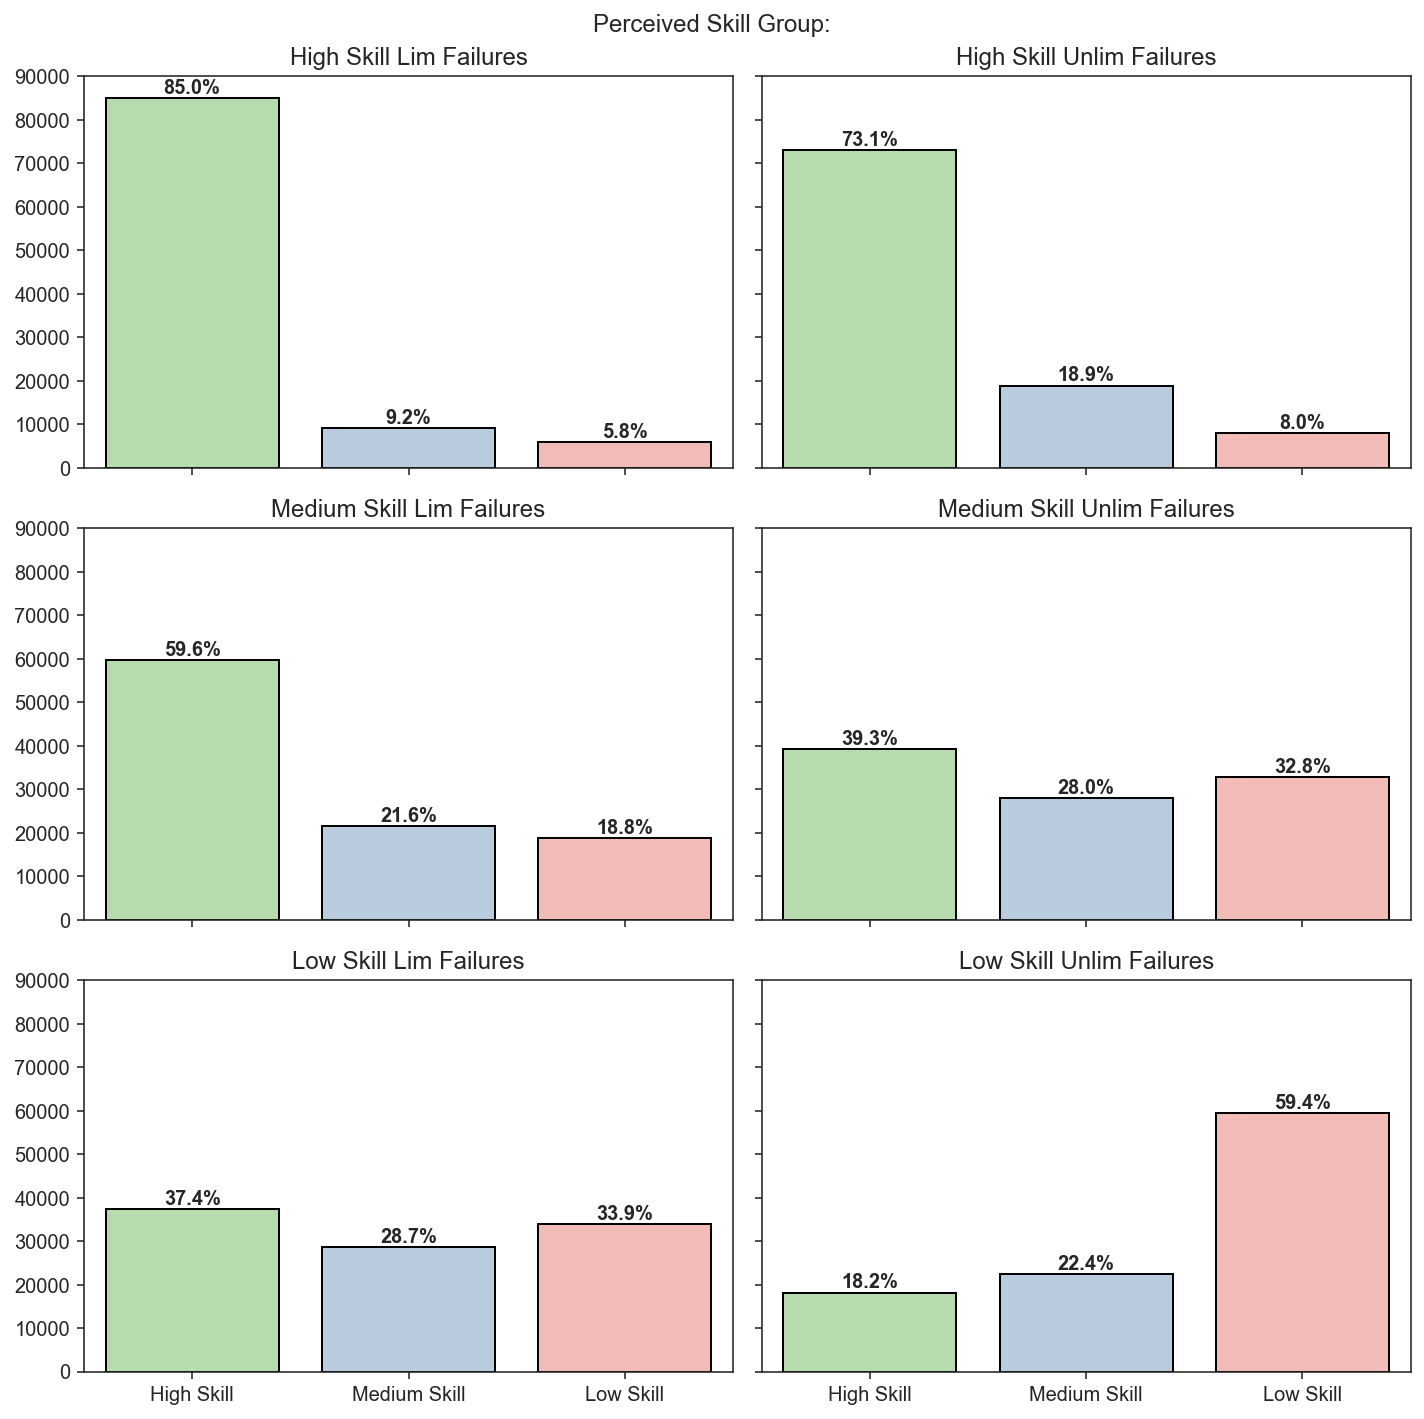

In [32]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharey=True)
sns.barplot(x=list(df_h_lim_tot_d.keys()),
            y=list(df_h_lim_tot_d.values()),
            ax=axes[0, 0],
            palette=pal,
            edgecolor='k')
sns.barplot(x=list(df_h_unlim_tot_d.keys()),
            y=list(df_h_unlim_tot_d.values()),
            ax=axes[0, 1],
            palette=pal,
            edgecolor='k')
sns.barplot(x=list(df_m_lim_tot_d.keys()),
            y=list(df_m_lim_tot_d.values()),
            ax=axes[1, 0],
            palette=pal,
            edgecolor='k')
sns.barplot(x=list(df_m_unlim_tot_d.keys()),
            y=list(df_m_unlim_tot_d.values()),
            ax=axes[1, 1],
            palette=pal,
            edgecolor='k')
sns.barplot(x=list(df_l_lim_tot_d.keys()),
            y=list(df_l_lim_tot_d.values()),
            ax=axes[2, 0],
            palette=pal,
            edgecolor='k')
sns.barplot(x=list(df_l_unlim_tot_d.keys()),
            y=list(df_l_unlim_tot_d.values()),
            ax=axes[2, 1],
            palette=pal,
            edgecolor='k')

for i in range(3):
    for j in range(2):
        for p in axes[i, j].patches:
            axes[i,
                 j].annotate('{:.1%}'.format(int(p.get_height())/100000),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center',
                             va='center',
                             xytext=(0, 5),
                             textcoords='offset points',
                             weight='bold')
            
# for i in range(3):
#     for j in range(2):
#         for p in axes[i, j].patches:
#             axes[i,
#                  j].annotate(format(int(p.get_height()), 'd'),
#                              (p.get_x() + p.get_width() / 2., p.get_height()),
#                              ha='center',
#                              va='center',
#                              xytext=(0, -8),
#                              textcoords='offset points',)
# #                              weight='bold')

for ax in axes.flat:
    ax.label_outer()
    ax.set_ylim([0,90000])
    
plt.xticks(range(len(df_l_lim_tot_d)), list(df_l_lim_tot_d.keys()))
axes[0, 0].set_title("High Skill Lim Failures")
axes[0, 1].set_title("High Skill Unlim Failures")
axes[1, 0].set_title("Medium Skill Lim Failures")
axes[1, 1].set_title("Medium Skill Unlim Failures")
axes[2, 0].set_title("Low Skill Lim Failures")
axes[2, 1].set_title("Low Skill Unlim Failures")
f.suptitle('Perceived Skill Group:')
plt.tight_layout()
plt.savefig('Perceived_Skill_Group_Lim_v_Unlim', dpi=300)

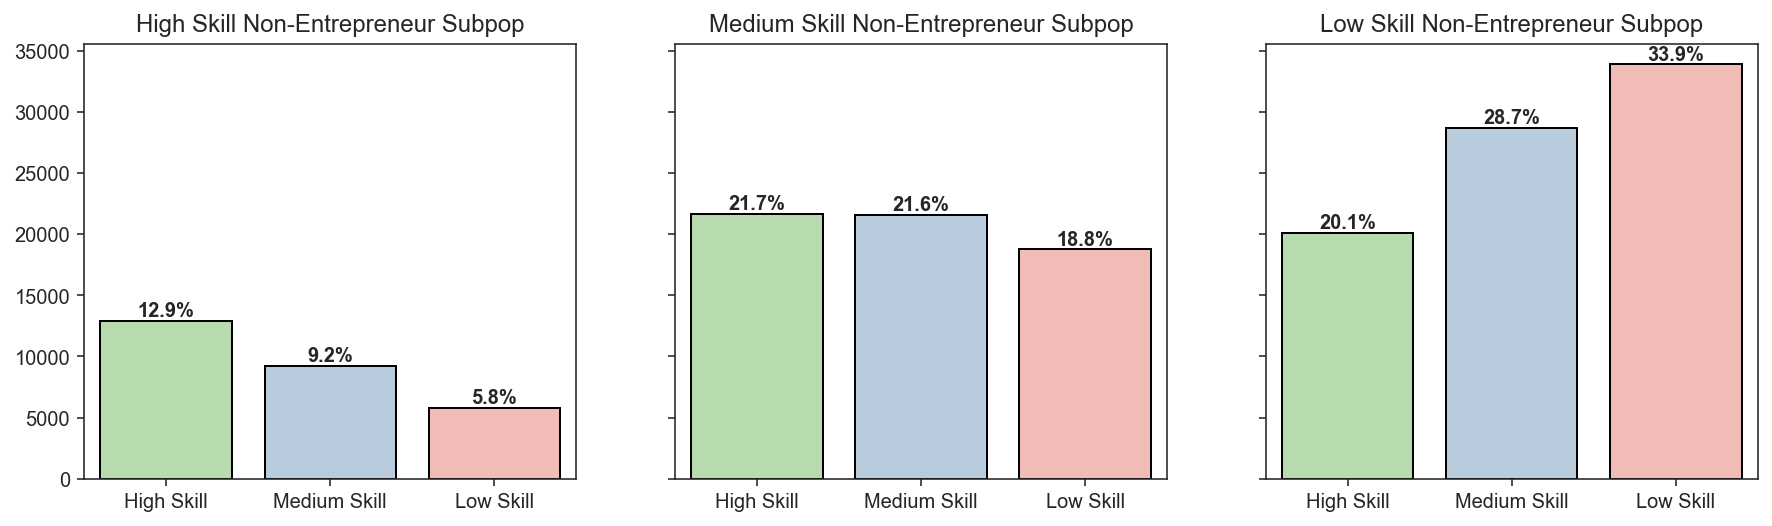

In [31]:
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axes[0] = sns.barplot(x=list(df_h_lim_tot_d_sub.keys()),
                      y=list(df_h_lim_tot_d_sub.values()),
                      ax=axes[0],
                      palette=pal,
                      edgecolor='k')
axes[1] = sns.barplot(x=list(df_m_lim_tot_d_sub.keys()),
                      y=list(df_m_lim_tot_d_sub.values()),
                      ax=axes[1],
                      palette=pal,
                      edgecolor='k')
axes[2] = sns.barplot(x=list(df_l_lim_tot_d_sub.keys()),
                      y=list(df_l_lim_tot_d_sub.values()),
                      ax=axes[2],
                      palette=pal,
                      edgecolor='k')

for i in range(3):
    for p in axes[i].patches:
        axes[i].annotate('{:.1%}'.format(int(p.get_height())/100000),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center',
                         va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         weight='bold')

# for i in range(3):
#     for p in axes[i].patches:
#         axes[i].annotate(format(int(p.get_height()), 'd'),
#                          (p.get_x() + p.get_width() / 2., p.get_height()),
#                          ha='center',
#                          va='center',
#                          xytext=(0, -8),
#                          textcoords='offset points',)
# #                          weight='bold')

plt.xticks(range(len(df_h_lim_tot_d_sub)), list(df_h_lim_tot_d_sub.keys()))
axes[0].set_title("High Skill Non-Entrepreneur Subpop")
axes[1].set_title("Medium Skill Non-Entrepreneur Subpop")
axes[2].set_title("Low Skill Non-Entrepreneur Subpop");
plt.savefig('Perceived_Skill_Group_Non_Entre', dpi=300)

These plots include the non-entrepeneur subpopulation at the age of 65. This means that they have failed at least 2 times in total, and stopped updating their perceived probability. For those that aren't within this subpopulation, they rate themselves as a high skill entrepreneur.